In [10]:
import flair
import torch

In [149]:
from flair.embeddings import BertEmbeddings
# The sentence objects holds a sentence that we may want to embed or tag
from flair.data import Sentence

# Make a sentence object by passing a whitespace tokenized string
sentence = Sentence('The trophy could not fit into the case because it was so small .')

In [150]:
embedding = BertEmbeddings()
embedding.embed(sentence)

[Sentence: "The trophy could not fit into the case because it was so small ." - 14 Tokens]

In [151]:
embedded = embedding.embed(sentence)

In [152]:
for token in sentence:
    print(token)
    print(token.embedding)
    print(token.embedding.size())

Token: 1 The
tensor([-0.2889, -0.0290, -0.4393,  ...,  0.2901,  0.3562, -0.6863])
torch.Size([3072])
Token: 2 trophy
tensor([ 0.3834, -0.3182,  0.0516,  ..., -0.1547,  0.1049,  0.2831])
torch.Size([3072])
Token: 3 could
tensor([ 0.1045, -0.0404, -0.2224,  ..., -0.7544,  0.5272, -0.5010])
torch.Size([3072])
Token: 4 not
tensor([-0.1554, -0.2756, -0.1362,  ..., -1.0448, -0.0372, -0.0248])
torch.Size([3072])
Token: 5 fit
tensor([-0.2408,  0.1490,  0.3287,  ..., -0.1567, -0.1422,  0.0502])
torch.Size([3072])
Token: 6 into
tensor([-1.1561, -0.0427, -0.0507,  ...,  0.2215,  0.8401,  0.3112])
torch.Size([3072])
Token: 7 the
tensor([-0.7404,  0.0967, -0.2723,  ...,  0.3708,  0.7055, -0.5206])
torch.Size([3072])
Token: 8 case
tensor([ 0.0597,  0.1064,  0.4324,  ...,  0.6000,  0.1201, -0.0252])
torch.Size([3072])
Token: 9 because
tensor([-0.6309,  0.6668,  0.2470,  ...,  0.6229,  0.2888,  1.4646])
torch.Size([3072])
Token: 10 it
tensor([-0.6364,  0.3888,  0.4664,  ...,  0.3343,  0.1638,  1.2435]

2019-05-17 06:46:34,805 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


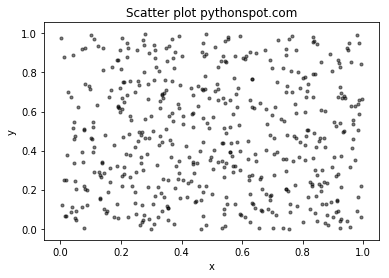

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline
# Create data

N = 500
x = np.random.rand(N)
y = np.random.rand(N)
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [154]:
labels = []
vectors = []

for token in sentence:
    labels.append(token.text)
    vectors.append(token.embedding.unsqueeze(0))
vectors = torch.cat(vectors)
#vectors = vectors.transpose(1,0)
print(vectors)
df= pd.DataFrame(vectors.numpy(),index=labels)

tensor([[-0.2889, -0.0290, -0.4393,  ...,  0.2901,  0.3562, -0.6863],
        [ 0.3834, -0.3182,  0.0516,  ..., -0.1547,  0.1049,  0.2831],
        [ 0.1045, -0.0404, -0.2224,  ..., -0.7544,  0.5272, -0.5010],
        ...,
        [-1.4116, -0.1706,  0.6171,  ..., -0.9664, -0.3990,  1.9097],
        [-1.2317,  0.1190,  0.1668,  ...,  0.6566,  0.3584, -0.1279],
        [ 0.3495,  0.0573, -0.0882,  ..., -0.9757,  0.2536,  0.0093]])


In [155]:
df

0         1         2         3         4         5         6     \
The     -0.288865 -0.028981 -0.439311  0.304789  0.604262  0.058177 -0.137087   
trophy   0.383430 -0.318220  0.051557  0.162779 -0.008764 -0.319301 -0.246034   
could    0.104453 -0.040403 -0.222404 -0.090314  0.372530  0.110963 -0.046403   
not     -0.155359 -0.275577 -0.136196  0.024807  0.653389  0.144906 -0.381596   
fit     -0.240777  0.149009  0.328740  0.227049  1.181834 -0.269430 -0.365774   
into    -1.156107 -0.042696 -0.050728 -0.062786  0.381570 -0.044439 -0.292806   
the     -0.740436  0.096743 -0.272282  0.388104  0.356301 -0.065703  0.109565   
case     0.059669  0.106442  0.432448  0.317032  0.182915 -0.435425 -0.315914   
because -0.630885  0.666779  0.247036  0.323814 -0.474126  0.005658  0.615805   
it      -0.636380  0.388758  0.466446  0.624778  0.483919 -0.279309 -0.432260   
was     -0.989697  0.257750  0.029312  0.158596 -0.195586 -0.317240 -0.096836   
so      -1.411555 -0.170590  0.617075  0.048294  0.493603 -0.019817  0.097377   
small   -1.231736  0.118993  0.166825  0.108476  0.669173 -0.782784 -1.103081   
.        0.349472  0.057336 -0.088179  0.544637 -0.202238 -0.538827  0.116497   

             7         8         9     ...      3062      3063      3064  \
The      0.247990  0.021882 -0.260166  ...  0.182426 -0.598216 -0.019230   
trophy   0.132476  0.031267 -0.446093  ... -0.876192 -0.518532 -0.079022   
could    0.592410 -0.127238  0.084606  ...  0.660531 -0.175262  0.078574   
not      0.639721 -0.192121 -0.368757  ...  1.204514 -0.511224  0.052436   
fit     -0.095402 -0.678502 -0.043765  ...  0.297662  0.388776  0.363540   
into     0.007627  0.546216  0.340735  ... -0.004990 -0.431835  0.669687   
the      0.241454 -0.073890 -0.183358  ...  0.894241  0.215301  0.254935   
case     0.057331 -0.110174  0.122086  ... -0.593117  0.101301  0.626941   
because  1.209147 -0.669974  0.218172  ...  0.277660 -0.747329  0.137173   
it       0.365761  0.126730  0.274120  ... -0.279757 -0.239395  0.575854   
was      0.576046 -0.023599  0.145376  ...  0.049970 -0.930277  0.293330   
so       1.744006  0.524647 -0.227105  ...  0.126832 -1.171094 -0.579757   
small    0.106333 -0.327722  0.360736  ... -0.321132 -0.699055  0.217413   
.       -0.059192  0.503519 -0.491468  ... -0.059110 -0.357791 -0.027866   

             3065      3066      3067      3068      3069      3070      3071  
The      0.143929  0.872532  0.742479 -0.331294  0.290123  0.356230 -0.686268  
trophy   0.731891  0.551359  0.823183 -0.847974 -0.154701  0.104930  0.283065  
could   -0.217153  0.250801  0.660399  0.045192 -0.754393  0.527203 -0.501019  
not     -0.978191  0.530640  0.897875  0.093287 -1.044771 -0.037151 -0.024850  
fit     -0.621761  0.270878  0.287853 -0.736857 -0.156673 -0.142198  0.050211  
into    -0.554719 -0.307137  0.301603 -0.414489  0.221512  0.840103  0.311182  
the     -0.082545  0.855856  0.763268 -0.830400  0.370820  0.705490 -0.520587  
case    -0.806607  0.471066  0.733339 -0.836784  0.600021  0.120075 -0.025152  
because  0.642940  0.054345  0.471539 -0.303399  0.622911  0.288843  1.464593  
it      -0.218775  0.445319 -0.952089 -0.301772  0.334258  0.163766  1.243529  
was      0.644478  0.536652 -0.503759 -0.192033  0.449420  0.358969  1.005875  
so      -0.912932  0.122358 -1.110933  0.074458 -0.966439 -0.399020  1.909667  
small   -0.168499  0.487151 -1.062502 -0.366722  0.656610  0.358370 -0.127926  
.        0.339143  0.253607 -0.204312  0.423297 -0.975683  0.253618  0.009347  

[14 rows x 3072 columns]

In [156]:
x = df.loc[labels,:].values
x

array([[-0.2888654 , -0.02898113, -0.43931082, ...,  0.29012325,
         0.35623014, -0.6862682 ],
       [ 0.38343024, -0.3182201 ,  0.05155726, ..., -0.15470108,
         0.10492988,  0.28306502],
       [ 0.10445266, -0.04040307, -0.2224043 , ..., -0.7543929 ,
         0.52720284, -0.50101924],
       ...,
       [-1.4115552 , -0.17059037,  0.61707485, ..., -0.9664388 ,
        -0.3990196 ,  1.9096671 ],
       [-1.2317356 ,  0.11899293,  0.1668252 , ...,  0.6566104 ,
         0.35836977, -0.12792557],
       [ 0.34947154,  0.05733561, -0.08817916, ..., -0.97568274,
         0.253618  ,  0.00934661]], dtype=float32)

In [157]:
#x = StandardScaler().fit_transform(x)
x

array([[-0.2888654 , -0.02898113, -0.43931082, ...,  0.29012325,
         0.35623014, -0.6862682 ],
       [ 0.38343024, -0.3182201 ,  0.05155726, ..., -0.15470108,
         0.10492988,  0.28306502],
       [ 0.10445266, -0.04040307, -0.2224043 , ..., -0.7543929 ,
         0.52720284, -0.50101924],
       ...,
       [-1.4115552 , -0.17059037,  0.61707485, ..., -0.9664388 ,
        -0.3990196 ,  1.9096671 ],
       [-1.2317356 ,  0.11899293,  0.1668252 , ...,  0.6566104 ,
         0.35836977, -0.12792557],
       [ 0.34947154,  0.05733561, -0.08817916, ..., -0.97568274,
         0.253618  ,  0.00934661]], dtype=float32)

In [158]:
df = pd.DataFrame(data = x, index = labels)

In [159]:
df

0         1         2         3         4         5         6     \
The     -0.288865 -0.028981 -0.439311  0.304789  0.604262  0.058177 -0.137087   
trophy   0.383430 -0.318220  0.051557  0.162779 -0.008764 -0.319301 -0.246034   
could    0.104453 -0.040403 -0.222404 -0.090314  0.372530  0.110963 -0.046403   
not     -0.155359 -0.275577 -0.136196  0.024807  0.653389  0.144906 -0.381596   
fit     -0.240777  0.149009  0.328740  0.227049  1.181834 -0.269430 -0.365774   
into    -1.156107 -0.042696 -0.050728 -0.062786  0.381570 -0.044439 -0.292806   
the     -0.740436  0.096743 -0.272282  0.388104  0.356301 -0.065703  0.109565   
case     0.059669  0.106442  0.432448  0.317032  0.182915 -0.435425 -0.315914   
because -0.630885  0.666779  0.247036  0.323814 -0.474126  0.005658  0.615805   
it      -0.636380  0.388758  0.466446  0.624778  0.483919 -0.279309 -0.432260   
was     -0.989697  0.257750  0.029312  0.158596 -0.195586 -0.317240 -0.096836   
so      -1.411555 -0.170590  0.617075  0.048294  0.493603 -0.019817  0.097377   
small   -1.231736  0.118993  0.166825  0.108476  0.669173 -0.782784 -1.103081   
.        0.349472  0.057336 -0.088179  0.544637 -0.202238 -0.538827  0.116497   

             7         8         9     ...      3062      3063      3064  \
The      0.247990  0.021882 -0.260166  ...  0.182426 -0.598216 -0.019230   
trophy   0.132476  0.031267 -0.446093  ... -0.876192 -0.518532 -0.079022   
could    0.592410 -0.127238  0.084606  ...  0.660531 -0.175262  0.078574   
not      0.639721 -0.192121 -0.368757  ...  1.204514 -0.511224  0.052436   
fit     -0.095402 -0.678502 -0.043765  ...  0.297662  0.388776  0.363540   
into     0.007627  0.546216  0.340735  ... -0.004990 -0.431835  0.669687   
the      0.241454 -0.073890 -0.183358  ...  0.894241  0.215301  0.254935   
case     0.057331 -0.110174  0.122086  ... -0.593117  0.101301  0.626941   
because  1.209147 -0.669974  0.218172  ...  0.277660 -0.747329  0.137173   
it       0.365761  0.126730  0.274120  ... -0.279757 -0.239395  0.575854   
was      0.576046 -0.023599  0.145376  ...  0.049970 -0.930277  0.293330   
so       1.744006  0.524647 -0.227105  ...  0.126832 -1.171094 -0.579757   
small    0.106333 -0.327722  0.360736  ... -0.321132 -0.699055  0.217413   
.       -0.059192  0.503519 -0.491468  ... -0.059110 -0.357791 -0.027866   

             3065      3066      3067      3068      3069      3070      3071  
The      0.143929  0.872532  0.742479 -0.331294  0.290123  0.356230 -0.686268  
trophy   0.731891  0.551359  0.823183 -0.847974 -0.154701  0.104930  0.283065  
could   -0.217153  0.250801  0.660399  0.045192 -0.754393  0.527203 -0.501019  
not     -0.978191  0.530640  0.897875  0.093287 -1.044771 -0.037151 -0.024850  
fit     -0.621761  0.270878  0.287853 -0.736857 -0.156673 -0.142198  0.050211  
into    -0.554719 -0.307137  0.301603 -0.414489  0.221512  0.840103  0.311182  
the     -0.082545  0.855856  0.763268 -0.830400  0.370820  0.705490 -0.520587  
case    -0.806607  0.471066  0.733339 -0.836784  0.600021  0.120075 -0.025152  
because  0.642940  0.054345  0.471539 -0.303399  0.622911  0.288843  1.464593  
it      -0.218775  0.445319 -0.952089 -0.301772  0.334258  0.163766  1.243529  
was      0.644478  0.536652 -0.503759 -0.192033  0.449420  0.358969  1.005875  
so      -0.912932  0.122358 -1.110933  0.074458 -0.966439 -0.399020  1.909667  
small   -0.168499  0.487151 -1.062502 -0.366722  0.656610  0.358370 -0.127926  
.        0.339143  0.253607 -0.204312  0.423297 -0.975683  0.253618  0.009347  

[14 rows x 3072 columns]

In [160]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [161]:
principalDf = pd.DataFrame(data = principalComponents, columns=['x','y'])

In [162]:
principalDf

x          y
0   -8.418922   1.425734
1  -11.776016  14.065495
2    4.804224   2.197613
3    7.619089   6.290894
4   -8.853552  -9.325861
5  -13.397047 -11.816921
6   -9.137254  -0.677946
7  -14.100891   4.986285
8   12.450633   8.980226
9   -1.518439 -10.913486
10  10.973074  -7.991562
11  22.664991  -3.915506
12   5.629025 -11.702168
13   3.061087  18.397196

In [163]:
tokens = pd.DataFrame(data=labels,columns=['Tokens'])

In [164]:
finalDf = pd.concat([principalDf, tokens], axis = 1)
finalDf

x          y   Tokens
0   -8.418922   1.425734      The
1  -11.776016  14.065495   trophy
2    4.804224   2.197613    could
3    7.619089   6.290894      not
4   -8.853552  -9.325861      fit
5  -13.397047 -11.816921     into
6   -9.137254  -0.677946      the
7  -14.100891   4.986285     case
8   12.450633   8.980226  because
9   -1.518439 -10.913486       it
10  10.973074  -7.991562      was
11  22.664991  -3.915506       so
12   5.629025 -11.702168    small
13   3.061087  18.397196        .

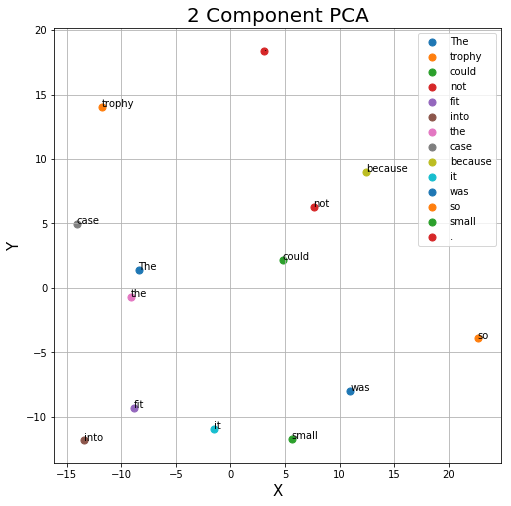

In [165]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('X', fontsize = 15)
ax.set_ylabel('Y', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

colors = ['r', 'g', 'b', 'yellow', 'purple']
count = 0
for target in labels:
    indicesToKeep = finalDf['Tokens'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'x']
               , finalDf.loc[indicesToKeep, 'y']
               , s = 50)
    ax.annotate(labels[count], (finalDf.loc[indicesToKeep, 'x']
               , finalDf.loc[indicesToKeep, 'y']))
    count+=1

ax.legend(labels)
ax.grid()